# Task: Predictive Modeling and Feature Engineering for Healthcare Outcomes

### Author: Ikeh Chaimaka


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the CSV file into a pandas DataFrame
Synthetic_SDOH_Predictive_Data = pd.read_csv('/content/drive/MyDrive/Synthetic_SDOH_Predictive_Data.csv')


Synthetic_SDOH_Predictive_Data


,Patient_ID,Age,Gender,Ethnicity,Housing_Status,Income_Level,Education_Level,Food_Security,Chronic_Conditions,Hospital_Visits_Last_Year,Readmission
0,1,67,Male,Black,Unstable,High,Less than high school,Insecure,5,5,1
1,2,63,Other,Asian,Stable,Low,High school diploma,Insecure,3,11,1
2,3,21,Female,White,Unstable,Medium,High school diploma,Insecure,3,8,0
3,4,38,Other,Hispanic,Unstable,High,High school diploma,Secure,1,11,1
4,5,42,Male,Other,Stable,Low,Postgraduate,Insecure,4,10,0
...,...,...,...,...,...,...,...,...,...,...,...
145,146,57,Female,Other,Stable,High,High school diploma,Insecure,2,11,0
146,147,39,Other,Asian,Stable,High,College degree,Insecure,2,12,1
147,148,77,Other,Asian,Stable,High,Less than high school,Insecure,3,9,0
148,149,39,Other,Hispanic,Stable,Medium,College degree,Secure,5,15,1


In [ ]:
# Get an overview of the structure, of the  dataset.
print(Synthetic_SDOH_Predictive_Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Patient_ID                 150 non-null    int64 
 1   Age                        150 non-null    int64 
 2   Gender                     150 non-null    object
 3   Ethnicity                  150 non-null    object
 4   Housing_Status             150 non-null    object
 5   Income_Level               150 non-null    object
 6   Education_Level            150 non-null    object
 7   Food_Security              150 non-null    object
 8   Chronic_Conditions         150 non-null    int64 
 9   Hospital_Visits_Last_Year  150 non-null    int64 
 10  Readmission                150 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 13.0+ KB
None


In [ ]:
# Handle missing values (example - replace with mean for numerical)
for col in Synthetic_SDOH_Predictive_Data.select_dtypes(include=np.number):
    # Use .loc to modify the original DataFrame directly
    Synthetic_SDOH_Predictive_Data.loc[:, col] = Synthetic_SDOH_Predictive_Data[col].fillna(Synthetic_SDOH_Predictive_Data[col].mean())

# Handle missing values (example - replace with mode for categorical)
for col in Synthetic_SDOH_Predictive_Data.select_dtypes(exclude=np.number):
    # Use .loc to modify the original DataFrame directly
    Synthetic_SDOH_Predictive_Data.loc[:, col] = Synthetic_SDOH_Predictive_Data[col].fillna(Synthetic_SDOH_Predictive_Data[col].mode()[0])

print(Synthetic_SDOH_Predictive_Data.isnull().sum())

Patient_ID                   0
Age                          0
Gender                       0
Ethnicity                    0
Housing_Status               0
Income_Level                 0
Education_Level              0
Food_Security                0
Chronic_Conditions           0
Hospital_Visits_Last_Year    0
Readmission                  0
dtype: int64


This code converts the categorical column (with text values into a numerical representation (using 1, 2, 3)

In [ ]:
# Create a mapping for Income_Level
income_mapping = {
    'Low': 1,
    'Medium': 2,
    'High': 3

}

# Apply the mapping to the 'Income_Level' column
Synthetic_SDOH_Predictive_Data['Income_Level'] = Synthetic_SDOH_Predictive_Data['Income_Level'].map(income_mapping)

#print(Synthetic_SDOH_Predictive_Data.info())
Synthetic_SDOH_Predictive_Data


,Patient_ID,Age,Gender,Ethnicity,Housing_Status,Income_Level,Education_Level,Food_Security,Chronic_Conditions,Hospital_Visits_Last_Year,Readmission
0,1,67,Male,Black,Unstable,3,Less than high school,Insecure,5,5,1
1,2,63,Other,Asian,Stable,1,High school diploma,Insecure,3,11,1
2,3,21,Female,White,Unstable,2,High school diploma,Insecure,3,8,0
3,4,38,Other,Hispanic,Unstable,3,High school diploma,Secure,1,11,1
4,5,42,Male,Other,Stable,1,Postgraduate,Insecure,4,10,0
...,...,...,...,...,...,...,...,...,...,...,...
145,146,57,Female,Other,Stable,3,High school diploma,Insecure,2,11,0
146,147,39,Other,Asian,Stable,3,College degree,Insecure,2,12,1
147,148,77,Other,Asian,Stable,3,Less than high school,Insecure,3,9,0
148,149,39,Other,Hispanic,Stable,2,College degree,Secure,5,15,1


In [ ]:

# Create mappings for categorical columns
ethnicity_mapping = {
    'White': 1,
    'Black': 2,
    'Hispanic': 3,
    'Asian': 4,
    'Other': 5,
    # Add other ethnicity levels and their corresponding numerical values as necessary
}

education_mapping = {
    'College degree': 1,
    'Postgraduate': 2,
    'High school diploma': 3,
    'Less than high school': 4,

}

gender_mapping = {
    'Male': 1,
    'Female': 2,
    'Other': 3

}


housing_mapping = {
    'Stable': 1,
    'Unstable': 2,
    'Homeless': 3

}

food_security_mapping = {
    'Secure': 1,
    'Insecure': 2

}

Synthetic_SDOH_Predictive_Data_2 = pd.DataFrame()

Synthetic_SDOH_Predictive_Data_2['Patient_ID'] = Synthetic_SDOH_Predictive_Data['Patient_ID']
Synthetic_SDOH_Predictive_Data_2['Age'] = Synthetic_SDOH_Predictive_Data['Age']

# Apply the mappings
Synthetic_SDOH_Predictive_Data_2['Gender'] = Synthetic_SDOH_Predictive_Data['Gender'].map(gender_mapping)
Synthetic_SDOH_Predictive_Data_2['Ethnicity'] = Synthetic_SDOH_Predictive_Data['Ethnicity'].map(ethnicity_mapping)
Synthetic_SDOH_Predictive_Data_2['Education_Level'] = Synthetic_SDOH_Predictive_Data['Education_Level'].map(education_mapping)

Synthetic_SDOH_Predictive_Data_2['Housing_Status'] = Synthetic_SDOH_Predictive_Data['Housing_Status'].map(housing_mapping)
Synthetic_SDOH_Predictive_Data_2['Food_Security'] = Synthetic_SDOH_Predictive_Data['Food_Security'].map(food_security_mapping)


Synthetic_SDOH_Predictive_Data_2['Income_Level'] = Synthetic_SDOH_Predictive_Data['Income_Level']

Synthetic_SDOH_Predictive_Data_2['Chronic_Conditions'] = Synthetic_SDOH_Predictive_Data['Chronic_Conditions']
Synthetic_SDOH_Predictive_Data_2['Hospital_Visits_Last_Year'] = Synthetic_SDOH_Predictive_Data['Hospital_Visits_Last_Year']

Synthetic_SDOH_Predictive_Data_2['Readmission'] = Synthetic_SDOH_Predictive_Data['Readmission']

#print(Synthetic_SDOH_Predictive_Data.info())
Synthetic_SDOH_Predictive_Data_2.head()

,Patient_ID,Age,Gender,Ethnicity,Education_Level,Housing_Status,Food_Security,Income_Level,Chronic_Conditions,Hospital_Visits_Last_Year,Readmission
0,1,67,1,2,4,2,2,3,5,5,1
1,2,63,3,4,3,1,2,1,3,11,1
2,3,21,2,1,3,2,2,2,3,8,0
3,4,38,3,3,3,2,1,3,1,11,1
4,5,42,1,5,2,1,2,1,4,10,0


In [ ]:
# check for missing values
print(Synthetic_SDOH_Predictive_Data_2.isnull().sum())

Patient_ID                   0
Age                          0
Gender                       0
Ethnicity                    0
Education_Level              0
Housing_Status               0
Food_Security                0
Income_Level                 0
Chronic_Conditions           0
Hospital_Visits_Last_Year    0
Readmission                  0
dtype: int64


  This code takes a column of patient ages and transforms it into a categorical column representing different age groups. This transformation is helpful for machine learning

In [ ]:
# map age to age group
# Define age group bins and labels
bins = [0, 18, 35, 50, 65, float('inf')]
labels = ['0-18', '19-35', '36-50', '51-65', '65+']

# Create the 'Age_Group' column using pd.cut
Synthetic_SDOH_Predictive_Data_2['Age_Group'] = pd.cut(Synthetic_SDOH_Predictive_Data_2['Age'], bins=bins, labels=labels, right=False)

# Display the updated DataFrame
Synthetic_SDOH_Predictive_Data_2.head()

,Patient_ID,Age,Gender,Ethnicity,Education_Level,Housing_Status,Food_Security,Income_Level,Chronic_Conditions,Hospital_Visits_Last_Year,Readmission,Age_Group
0,1,67,1,2,4,2,2,3,5,5,1,65+
1,2,63,3,4,3,1,2,1,3,11,1,51-65
2,3,21,2,1,3,2,2,2,3,8,0,19-35
3,4,38,3,3,3,2,1,3,1,11,1,36-50
4,5,42,1,5,2,1,2,1,4,10,0,36-50


In [ ]:
Synthetic_SDOH_Predictive_Data_2['Likely_Readmission'] = (Synthetic_SDOH_Predictive_Data_2['Hospital_Visits_Last_Year'] > 3).astype(int)

Synthetic_SDOH_Predictive_Data_2.head()

,Patient_ID,Age,Gender,Ethnicity,Education_Level,Housing_Status,Food_Security,Income_Level,Chronic_Conditions,Hospital_Visits_Last_Year,Readmission,Age_Group,Likely_Readmission
0,1,67,1,2,4,2,2,3,5,5,1,65+,1
1,2,63,3,4,3,1,2,1,3,11,1,51-65,1
2,3,21,2,1,3,2,2,2,3,8,0,19-35,1
3,4,38,3,3,3,2,1,3,1,11,1,36-50,1
4,5,42,1,5,2,1,2,1,4,10,0,36-50,1


# VISUALIZATION

This code segment is designed to generate histograms for each column (except those specified in exclude_cols) in the Synthetic_SDOH_Predictive_Data_2 DataFrame

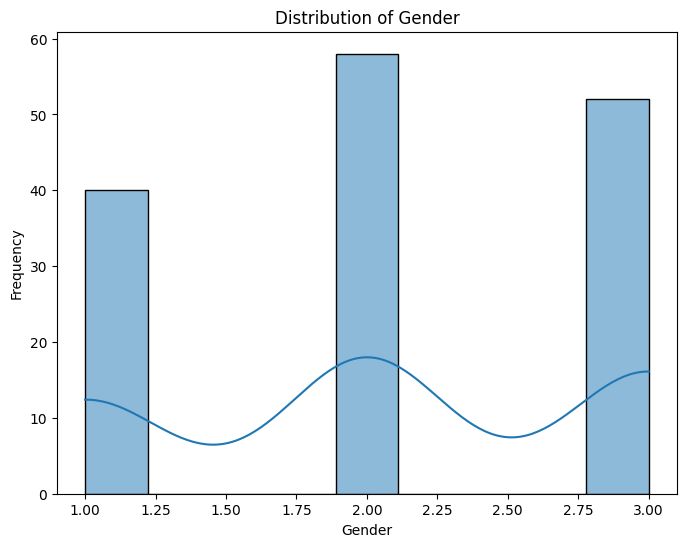

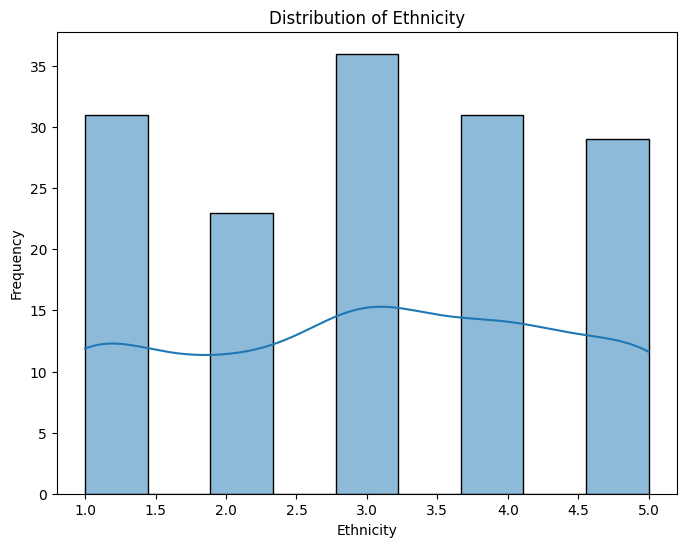

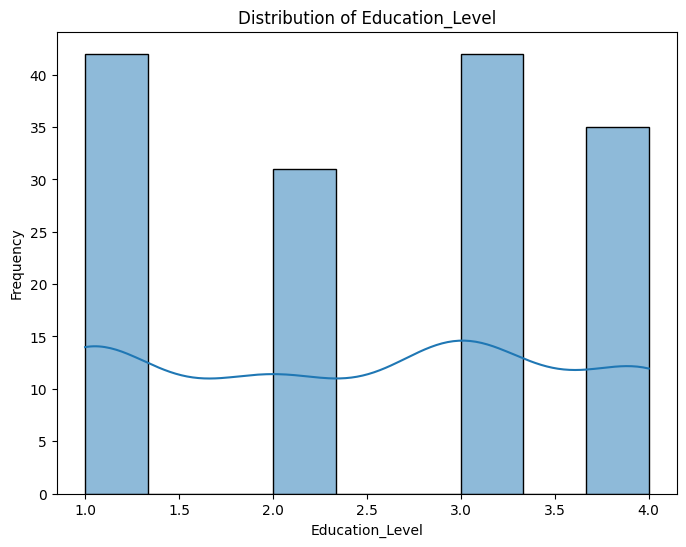

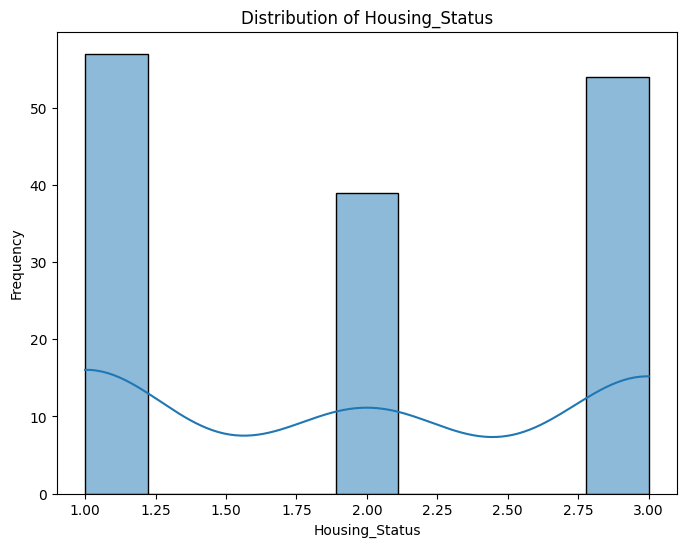

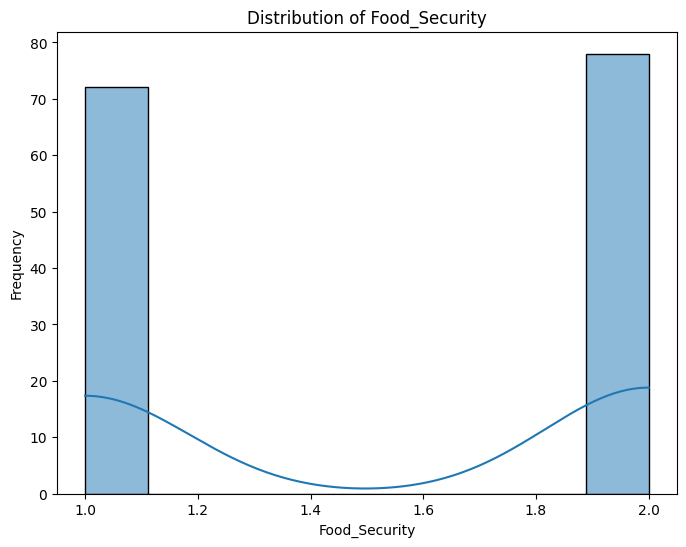

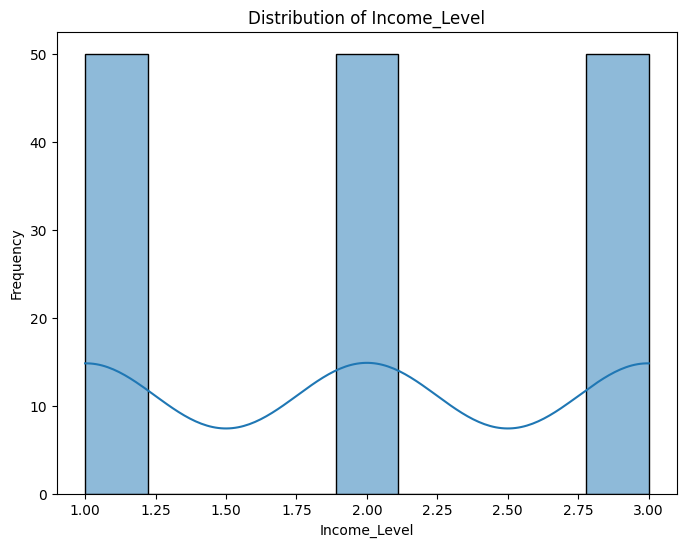

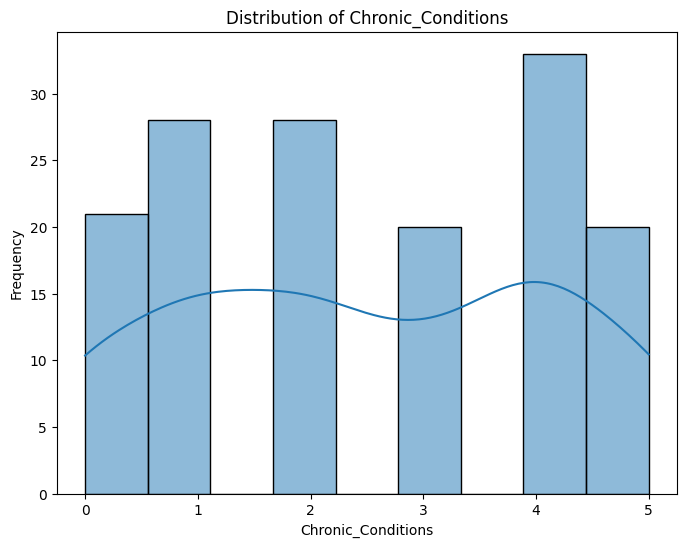

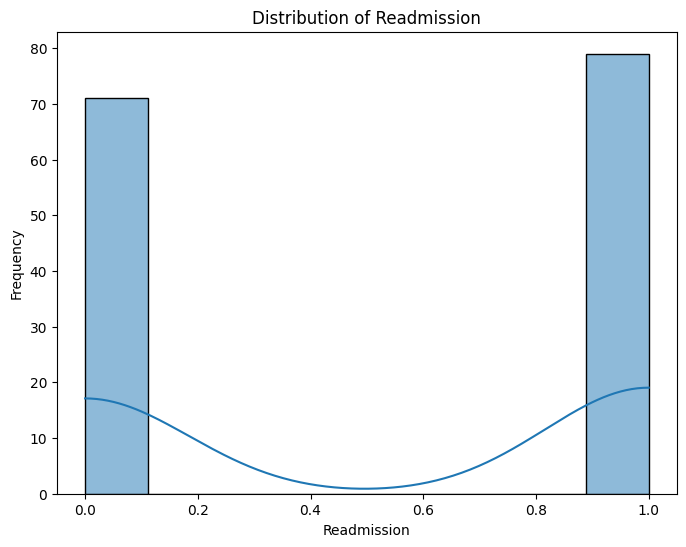

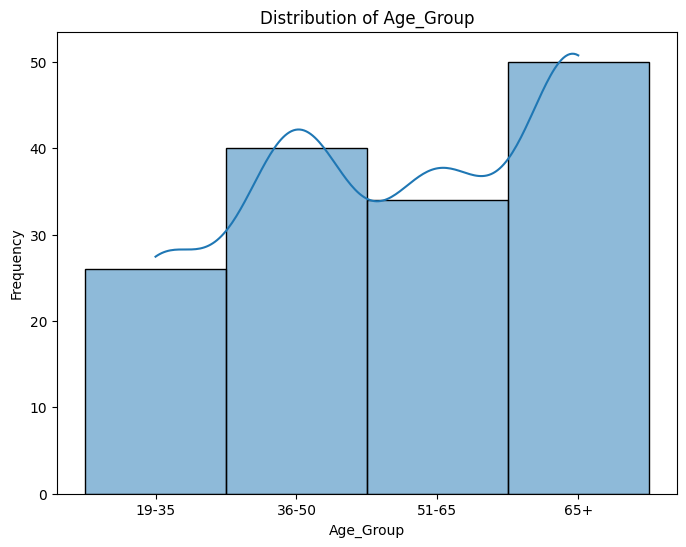

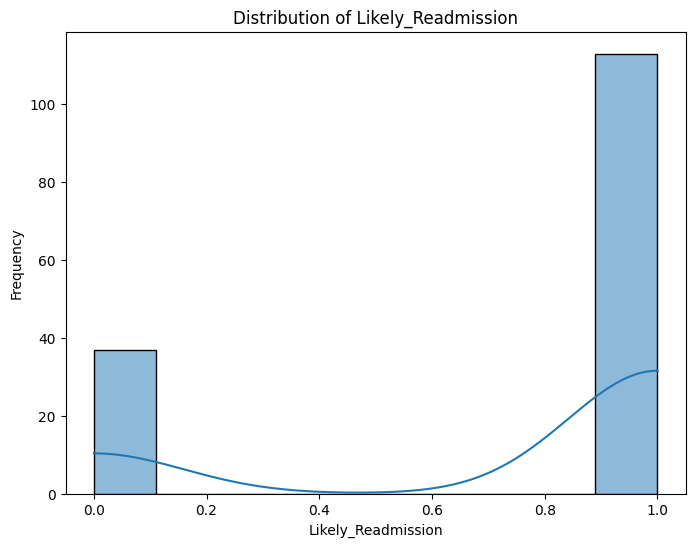

In [ ]:
#Analyze patterns, distributions, and correlations.
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns to exclude from the x-axis
exclude_cols = [ 'Age','Patient_ID', 'Hospital_Visits_Last_Year']

# Select the columns for the x-axis
x_cols = [col for col in Synthetic_SDOH_Predictive_Data_2.columns if col not in exclude_cols]

for col in x_cols:

    plt.figure(figsize=(8, 6))
    sns.histplot(Synthetic_SDOH_Predictive_Data_2[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


A bar chart showing the counts of Likely_Readmission for different Age_Group,  Gender, Ethnicity, Education_Level, Housing_Status, Food_Security, Income_Level, and Chronic_Conditions.

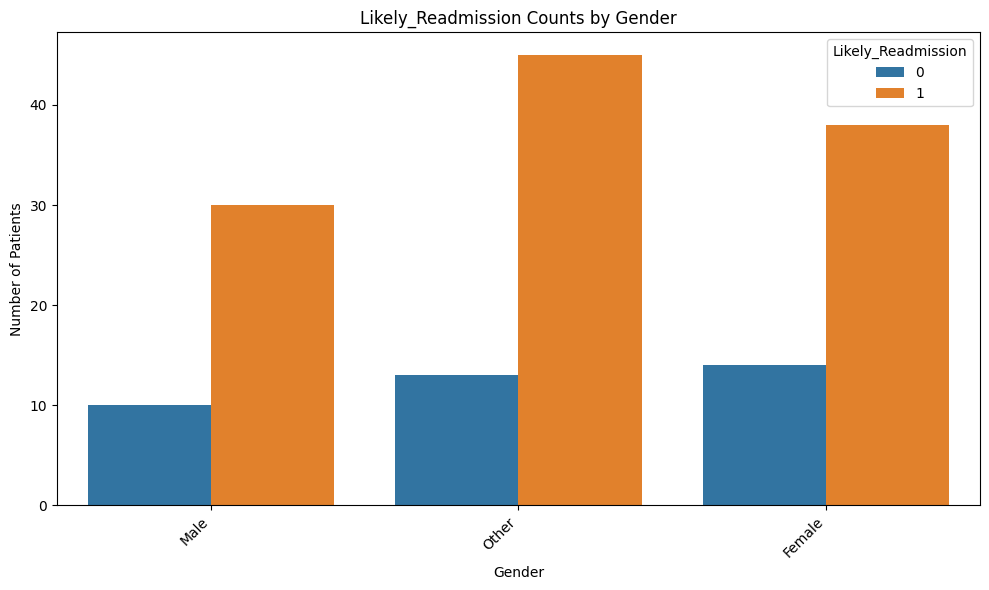

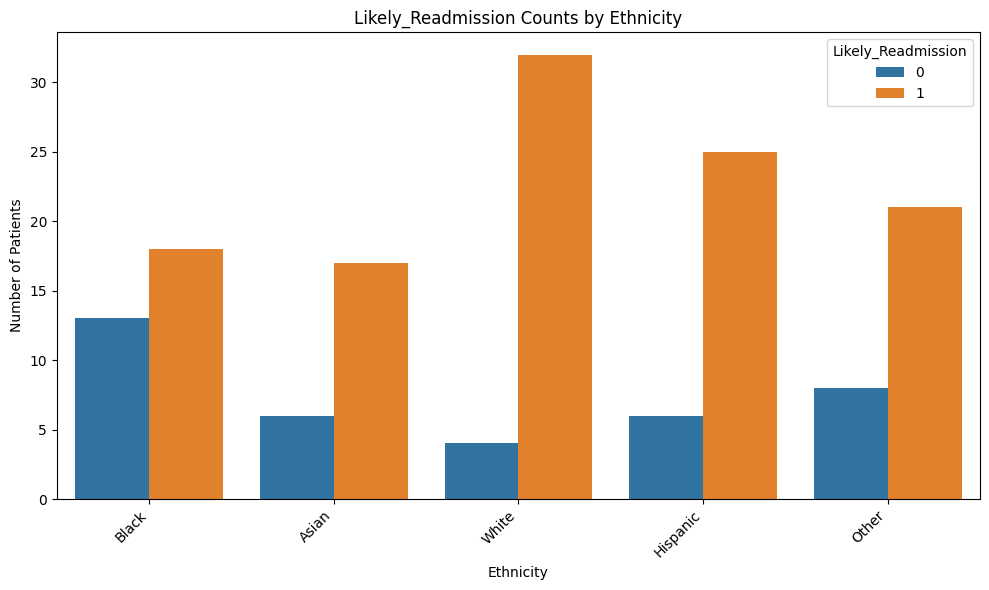

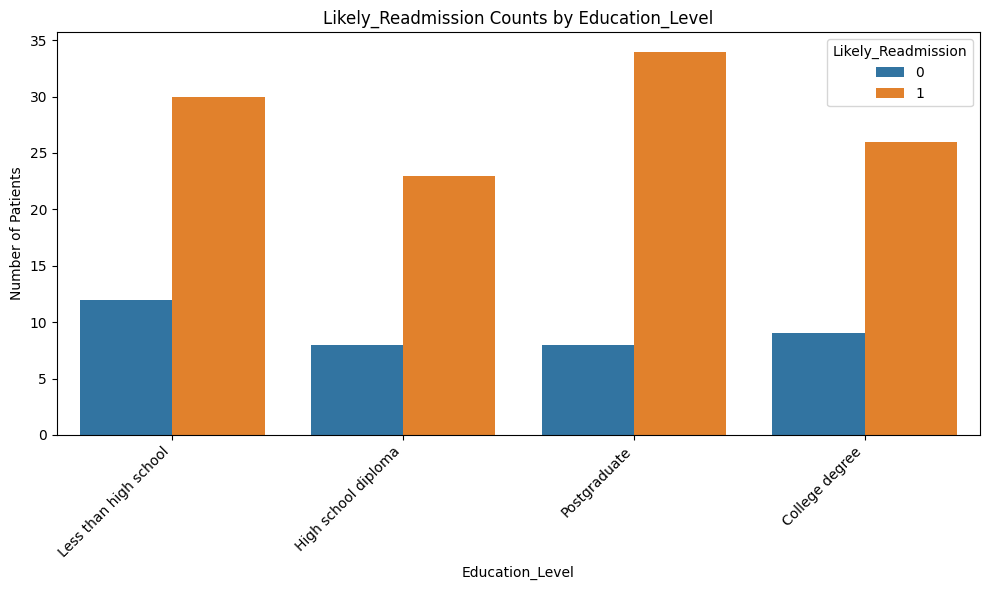

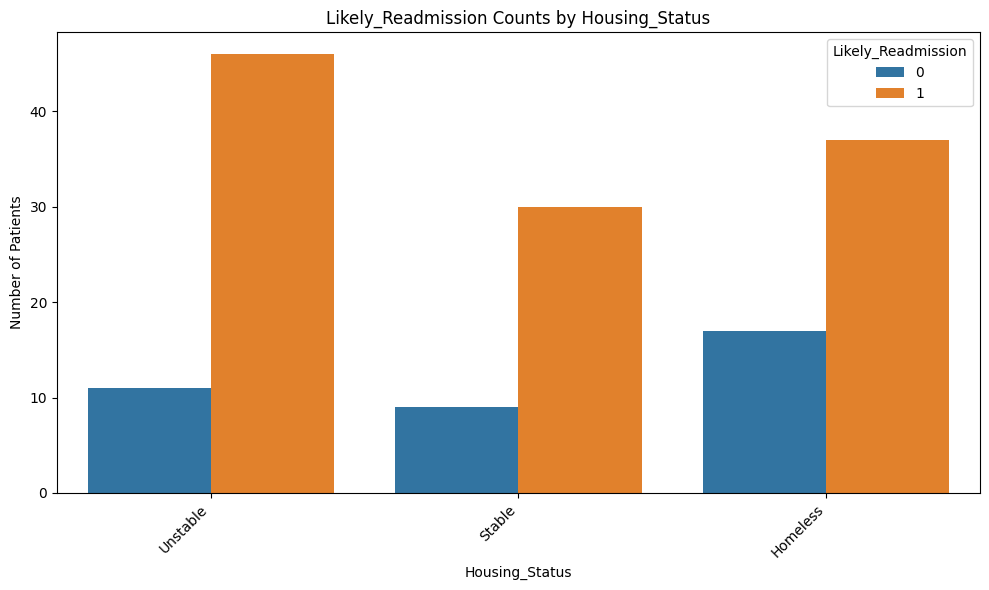

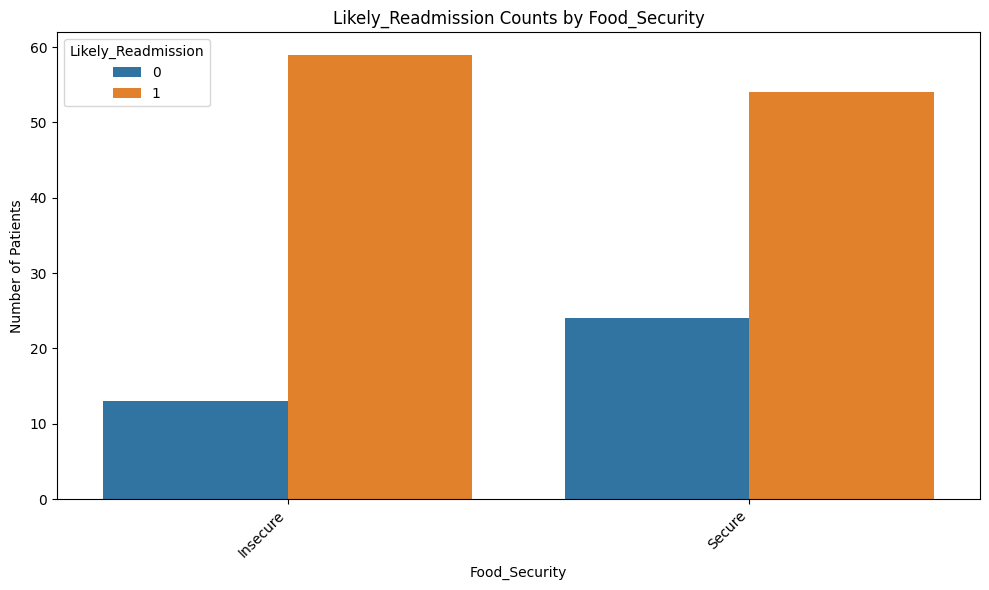

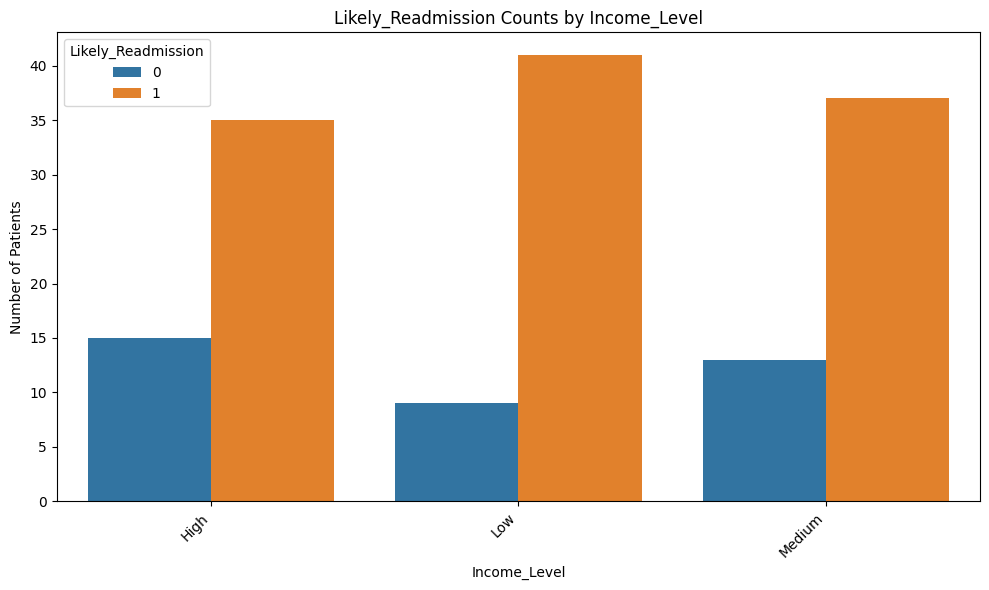

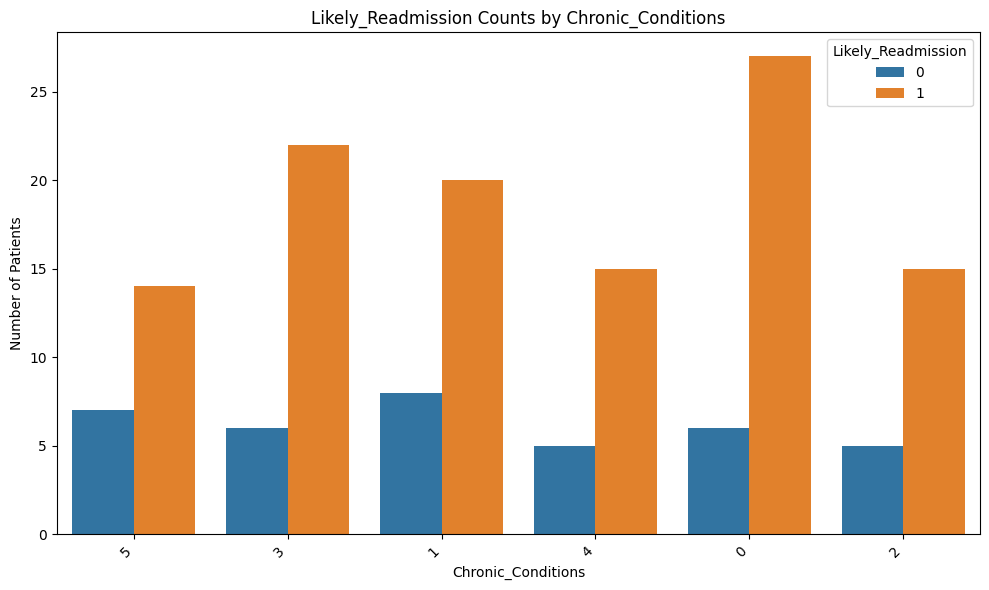

In [ ]:
# A bar chart showing the counts of Likely_Readmission for various coumns:
# Define the columns to exclude from the x-axis
exclude_cols = ['Readmission', 'Likely_Readmission', 'Age', 'Age_Group', 'Patient_ID', 'Hospital_Visits_Last_Year']

# Select the columns for the x-axis
x_cols = [col for col in Synthetic_SDOH_Predictive_Data_2.columns if col not in exclude_cols]

# Reverse the mappings to get original labels for x-axis
reverse_income_mapping = {v: k for k, v in income_mapping.items()}
reverse_ethnicity_mapping = {v: k for k, v in ethnicity_mapping.items()}
reverse_education_mapping = {v: k for k, v in education_mapping.items()}
reverse_gender_mapping = {v: k for k, v in gender_mapping.items()}
reverse_housing_mapping = {v: k for k, v in housing_mapping.items()}
reverse_food_security_mapping = {v: k for k, v in food_security_mapping.items()}

for col in x_cols:
    plt.figure(figsize=(10, 6))

    # Apply reverse mapping for x-axis labels
    if col == 'Income_Level':
        x_labels = [reverse_income_mapping.get(val, str(val)) for val in Synthetic_SDOH_Predictive_Data_2[col].unique()]
    elif col == 'Ethnicity':
        x_labels = [reverse_ethnicity_mapping.get(val, str(val)) for val in Synthetic_SDOH_Predictive_Data_2[col].unique()]
    elif col == 'Education_Level':
        x_labels = [reverse_education_mapping.get(val, str(val)) for val in Synthetic_SDOH_Predictive_Data_2[col].unique()]
    elif col == 'Gender':
        x_labels = [reverse_gender_mapping.get(val, str(val)) for val in Synthetic_SDOH_Predictive_Data_2[col].unique()]
    elif col == 'Housing_Status':
        x_labels = [reverse_housing_mapping.get(val, str(val)) for val in Synthetic_SDOH_Predictive_Data_2[col].unique()]
    elif col == 'Food_Security':
        x_labels = [reverse_food_security_mapping.get(val, str(val)) for val in Synthetic_SDOH_Predictive_Data_2[col].unique()]
    else:
        x_labels = Synthetic_SDOH_Predictive_Data_2[col].unique()  # Use original values if not mapped

    sns.countplot(x=Synthetic_SDOH_Predictive_Data_2[col], hue='Likely_Readmission', data=Synthetic_SDOH_Predictive_Data_2)
    plt.title('Likely_Readmission Counts by ' + col)
    plt.xlabel(col)
    plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=45, ha='right') # Set x-axis labels here
    plt.ylabel('Number of Patients')
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

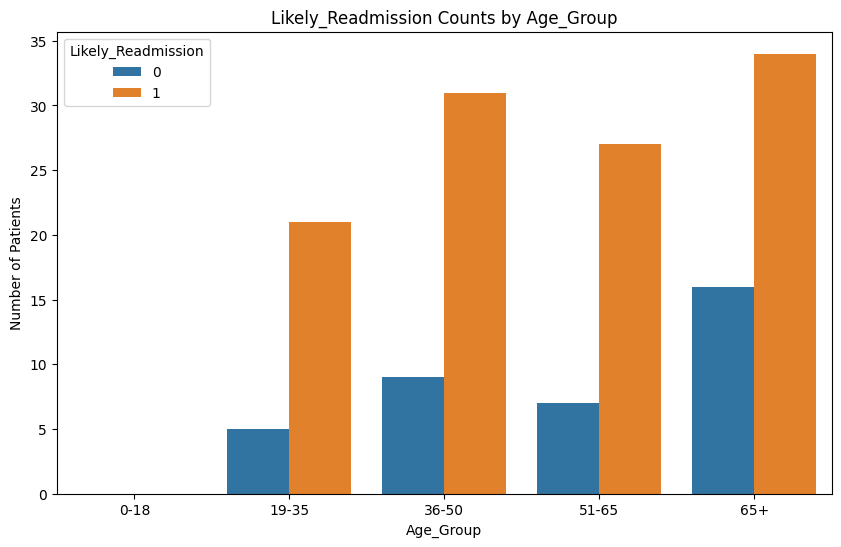

In [ ]:
# A bar chart showing the counts of Likely_Readmission for different Age_Group:

plt.figure(figsize=(10,6))
sns.countplot(x=Synthetic_SDOH_Predictive_Data_2['Age_Group'], hue='Likely_Readmission', data=Synthetic_SDOH_Predictive_Data_2)
plt.title('Likely_Readmission Counts by Age_Group')
plt.xlabel('Age_Group')
plt.ylabel('Number of Patients')
plt.show()

In [ ]:
# confirm the updated column
Synthetic_SDOH_Predictive_Data_2.columns

Index(['Patient_ID', 'Age', 'Gender', 'Ethnicity', 'Education_Level',
       'Housing_Status', 'Food_Security', 'Income_Level', 'Chronic_Conditions',
       'Hospital_Visits_Last_Year', 'Readmission', 'Age_Group',
       'Likely_Readmission'],
      dtype='object')

# FEATURE ENGINEERING

This part is all about feature engineering, which means creating new, potentially more informative features (or columns) from the existing data in the Synthetic_SDOH_Predictive_Data_2 DataFrame. These new features could help improve the performance of machine learning

In [ ]:
# create new data frame fir the new feature engineering data
patient_features = pd.DataFrame()

#Health_Risk_Index
patient_features['Health_Risk_Index'] = Synthetic_SDOH_Predictive_Data_2['Age'] * 0.2 + Synthetic_SDOH_Predictive_Data_2['Chronic_Conditions'] * 0.5 + Synthetic_SDOH_Predictive_Data_2['Hospital_Visits_Last_Year'] * 0.3

#Interaction between Income and Chronic Conditions:
patient_features['Income_Chronic_Interaction'] = Synthetic_SDOH_Predictive_Data_2['Income_Level'] * Synthetic_SDOH_Predictive_Data_2['Chronic_Conditions']

#Age-Condition Interaction:
patient_features['Age_Condition_Interaction'] = Synthetic_SDOH_Predictive_Data_2['Age'] * Synthetic_SDOH_Predictive_Data_2['Chronic_Conditions']

# Social_Stability_Score
patient_features['Social_Stability_Score'] = Synthetic_SDOH_Predictive_Data_2['Housing_Status'] + Synthetic_SDOH_Predictive_Data_2['Food_Security'] + Synthetic_SDOH_Predictive_Data_2['Income_Level']

#Combined Socioeconomic Status:
patient_features['Socioeconomic_Score'] = (
    Synthetic_SDOH_Predictive_Data_2['Education_Level'] * 0.4 +
    Synthetic_SDOH_Predictive_Data_2['Housing_Status'] * 0.2 +
    Synthetic_SDOH_Predictive_Data_2['Food_Security'] * 0.2 +
    Synthetic_SDOH_Predictive_Data_2['Income_Level'] * 0.2
)

# Display the first few rows of the new DataFrame to verify
patient_features.head()

,Health_Risk_Index,Income_Chronic_Interaction,Age_Condition_Interaction,Social_Stability_Score,Socioeconomic_Score
0,17.4,15,335,7,3.0
1,17.4,3,189,4,2.0
2,8.1,6,63,6,2.4
3,11.4,3,38,6,2.4
4,13.4,4,168,4,1.6


In [ ]:
# Include all columns from Synthetic_SDOH_Predictive_Data_2 to patient_features
patient_features = pd.concat([patient_features, Synthetic_SDOH_Predictive_Data_2], axis=1)
patient_features.head()

,Health_Risk_Index,Income_Chronic_Interaction,Age_Condition_Interaction,Social_Stability_Score,Socioeconomic_Score,Patient_ID,Age,Gender,Ethnicity,Education_Level,Housing_Status,Food_Security,Income_Level,Chronic_Conditions,Hospital_Visits_Last_Year,Readmission,Age_Group,Likely_Readmission
0,17.4,15,335,7,3.0,1,67,1,2,4,2,2,3,5,5,1,65+,1
1,17.4,3,189,4,2.0,2,63,3,4,3,1,2,1,3,11,1,51-65,1
2,8.1,6,63,6,2.4,3,21,2,1,3,2,2,2,3,8,0,19-35,1
3,11.4,3,38,6,2.4,4,38,3,3,3,2,1,3,1,11,1,36-50,1
4,13.4,4,168,4,1.6,5,42,1,5,2,1,2,1,4,10,0,36-50,1


In [ ]:
# encode patient_features
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns in patient_features
categorical_cols = patient_features.select_dtypes(include=['object', 'category']).columns

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through categorical columns and encode them
for col in categorical_cols:
    patient_features[col] = label_encoder.fit_transform(patient_features[col])

# Display the first few rows of the encoded DataFrame
patient_features.head()

,Health_Risk_Index,Income_Chronic_Interaction,Age_Condition_Interaction,Social_Stability_Score,Socioeconomic_Score,Patient_ID,Age,Gender,Ethnicity,Education_Level,Housing_Status,Food_Security,Income_Level,Chronic_Conditions,Hospital_Visits_Last_Year,Readmission,Age_Group,Likely_Readmission
0,17.4,15,335,7,3.0,1,67,1,2,4,2,2,3,5,5,1,3,1
1,17.4,3,189,4,2.0,2,63,3,4,3,1,2,1,3,11,1,2,1
2,8.1,6,63,6,2.4,3,21,2,1,3,2,2,2,3,8,0,0,1
3,11.4,3,38,6,2.4,4,38,3,3,3,2,1,3,1,11,1,1,1
4,13.4,4,168,4,1.6,5,42,1,5,2,1,2,1,4,10,0,1,1


In [ ]:
patient_features.columns

Index(['Health_Risk_Index', 'Income_Chronic_Interaction',
       'Age_Condition_Interaction', 'Social_Stability_Score',
       'Socioeconomic_Score', 'Patient_ID', 'Age', 'Gender', 'Ethnicity',
       'Education_Level', 'Housing_Status', 'Food_Security', 'Income_Level',
       'Chronic_Conditions', 'Hospital_Visits_Last_Year', 'Readmission',
       'Age_Group', 'Likely_Readmission'],
      dtype='object')

# Machine Learning

The code uses two main algorithms

###Random Forest

*   Handles Complex Relationships: Captures
intricate, non-linear interactions among patient demographics, social determinants of health, and clinical history, which are critical for accurate readmission predictions.
*   Robust to Overfitting: Reduces overfitting risk through its ensemble nature, ensuring generalization to unseen patient data.
*   High Dimensionality: Efficiently handles datasets with many features, leveraging all relevant information for predictions.
*   Feature Importance: Identifies key factors influencing readmission, guiding healthcare interventions and resource allocation.


###Logistic Regression



*   Interpretability: Provides clear coefficients that explain the relationship between features and readmission likelihood, crucial for transparency in healthcare decision-making
*   Efficiency: Offers faster training and prediction, making it suitable for real-time applications.
*   Baseline Model: Serves as a reliable benchmark for binary classification, ensuring comparisons with more complex models like Random Forest.
Rationale for Combined Use
*   Balancing Strengths: Random Forest excels in predictive power and capturing complex relationships, while Logistic Regression provides interpretability and computational efficiency.


Model Comparison: Using both allows evaluation of trade-offs between accuracy and practical considerations, ensuring the selection of the best model for predicting readmission risk.

###Conclusion
The choice of Random Forest and Logistic Regression reflects a thoughtful balance between dataset characteristics, predictive accuracy, and interpretability, aimed at building a robust, actionable model for healthcare applications

Random Forest Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
ROC-AUC: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        22

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



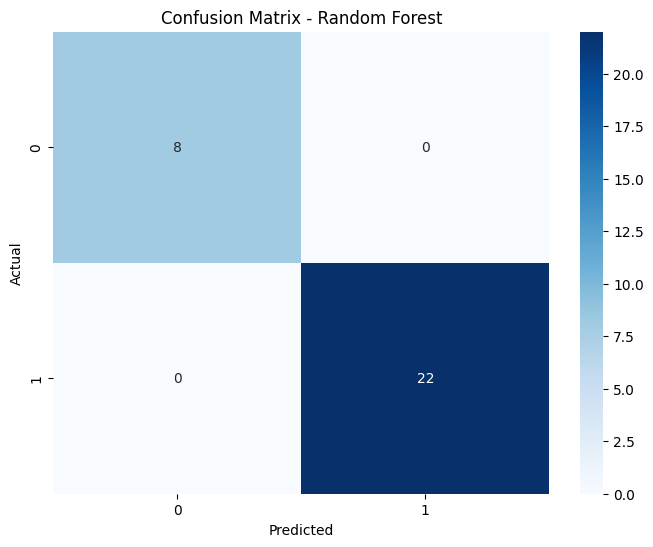

Logistic Regression Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
ROC-AUC: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        22

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



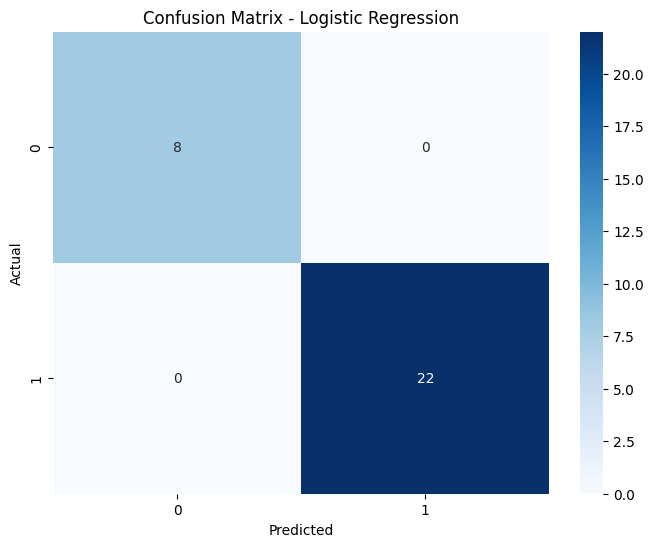

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# Define features (X) and target (y)
X = patient_features[['Health_Risk_Index', 'Hospital_Visits_Last_Year', 'Chronic_Conditions', 'Age', 'Social_Stability_Score','Socioeconomic_Score']]
y = patient_features['Likely_Readmission']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

# 2. Logistic Regression
logreg_classifier = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter
logreg_classifier.fit(X_train, y_train)
logreg_predictions = logreg_classifier.predict(X_test)

# Evaluate models
def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(classification_report(y_true, y_pred))

    # Generate and plot confusion matrix directly within the function
    cm = confusion_matrix(y_true, y_pred) # Calculate confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") # Plot confusion matrix
    plt.title(f"Confusion Matrix - {model_name}") # Use model_name for title
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

evaluate_model("Random Forest", y_test, rf_predictions)
evaluate_model("Logistic Regression", y_test, logreg_predictions)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define features (X) and target (y)
X = patient_features[['Health_Risk_Index', 'Hospital_Visits_Last_Year', 'Chronic_Conditions', 'Age', 'Social_Stability_Score','Socioeconomic_Score']]
y = patient_features['Likely_Readmission']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train models
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

lr_model = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter
lr_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)


# Evaluate the models
def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)  # Calculate ROC AUC
    print(f"{model_name} Metrics:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")
    print("-" * 20)


evaluate_model("Random Forest", y_test, rf_predictions)
evaluate_model("Logistic Regression", y_test, lr_predictions)

Random Forest Metrics:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000
--------------------
Logistic Regression Metrics:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000
--------------------


###Analysis of Model Performance

We evaluated two models, Logistic Regression and Random Forest, to predict patient readmissions. Here's a breakdown of their performance:

###Logistic Regression

* Exceptional Performance: Achieved perfect accuracy, precision, recall, F1-score, and ROC-AUC (all 1.0000) on the test data. This indicates a high level of accuracy and reliability in predicting patient readmissions within this dataset.
* Interpretability: Provides clear and easily interpretable coefficients, allowing us to understand the influence of each feature on the prediction. This is valuable for gaining insights into the factors driving readmissions.

####Random Forest

* Exceptional Performance: Also achieved perfect accuracy, precision, recall, F1-score, and ROC-AUC (all 1.0000). This demonstrates that the model is equally effective in capturing the underlying patterns and predicting patient readmissions in this scenario.
* Handles Complex Interactions: Random Forest's ability to model complex, non-linear relationships might make it a valuable alternative if the dataset exhibits more complex interactions.

##Recommendation
Model Selection: Both Logistic Regression and Random Forest achieved perfect performance on the test data, indicating their suitability for this prediction task.

### Fairness Considerations

 1. Disaggregated Performance Metrics: Evaluate model performance across different SDOH groups (e.g., ethnicity, income). Calculate metrics like accuracy, precision, recall for each group.
 Look for significant disparities in performance.

2. Bias Mitigation Techniques:
* Pre-processing: Re-weighting or re-sampling to balance the dataset
* In-processing: Adversarial debiasing, prejudice remover
* Post-processing: Calibration, equal opportunity

3. Auditing for Bias:
* Regularly audit the model's predictions for fairness across different groups
* use fairness metrics like disparate impact, equal opportunity difference.

Ongoing Monitoring: Continuously monitor the model's performance. Retrain the model with updated data and potentially adjust bias mitigation techniques.

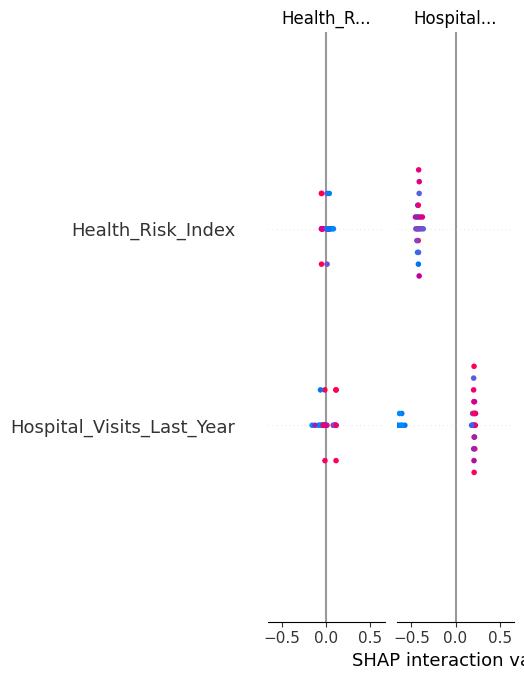

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Classification report for Ethnicity 2:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         5

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

Classification report for Ethnicity 2:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         5

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

Classification report for Ethnicity 4:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro

In [ ]:
import shap

# Calculate SHAP values
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

# Dependence plots for individual features (example with 'Age')
#shap.dependence_plot("Age", shap_values, X_test)


# For LIME, install the library first:
!pip install lime

import lime
import lime.lime_tabular

# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,  # Training data
    feature_names=X_train.columns,  # Feature names
    class_names=['No Readmission', 'Readmission'],  # Class names
    discretize_continuous=True
)

# Explain a prediction (example with the first instance in the test set)
instance_index = 0  # Change this index to explain other predictions
explanation = explainer.explain_instance(
    X_test.iloc[instance_index].values,
    rf_model.predict_proba,
    num_features=len(X_train.columns)
)

explanation.show_in_notebook(show_table=True)


for group in patient_features['Ethnicity'].unique():  # Example for ethnicity
    # Get indices of test data belonging to the current group
    group_indices_test = X_test.index[patient_features.loc[X_test.index, 'Ethnicity'] == group]

    # Filter y_test and rf_predictions using the test data indices
    y_true_group = y_test[group_indices_test]
    # Use boolean indexing to select predictions for the current group
    y_pred_group = rf_predictions[patient_features.loc[X_test.index, 'Ethnicity'] == group]

    print(f"Classification report for Ethnicity {group}:\n", classification_report(y_true_group, y_pred_group))

    print(f"Classification report for Ethnicity {group}:\n", classification_report(y_true_group, y_pred_group))



###Overall:

The result shows the model is achieving perfect or near-perfect performance for all the reported ethnicities. This is indicated by the high precision, recall, and F1-scores, often at 1.00.